                UNIQUE_ID COUNTYFP  PCTNUM        PRECINCTNA CDE_COUNTY  \
0               02 ALPINE      001  AP0002            ALPINE         AP   
1     03 CANYON DE CHELLY      001  AP0003  CANYON DE CHELLY         AP   
2               05 CHINLE      001  AP0005            CHINLE         AP   
3               09 CONCHO      001  AP0009            CONCHO         AP   
4           11 COTTONWOOD      001  AP0011        COTTONWOOD         AP   
...                   ...      ...     ...               ...        ...   
1484        003 CLIFTON 1      011  GN0003         CLIFTON 1         GN   
1485   006 EAST PLANTSITE      011  GN0006    EAST PLANTSITE         GN   
1486       GHOST (232.00)      025  YA0232             GHOST         YA   
1487         BUG (222.00)      025  YA0222               BUG         YA   
1488        IRON (225.00)      025  YA0225              IRON         YA   

     COUNTY_NAM CON_DIST SLDL_DIST SLDU_DIST  G20PREDBID  ...  GSL28DLIE  \
0        Apache       0

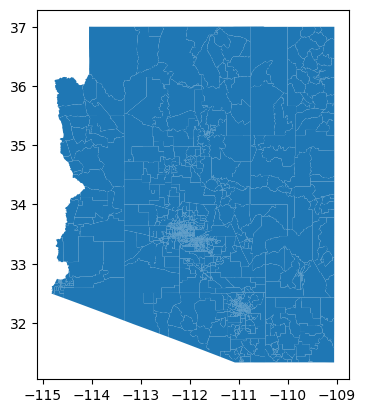

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = './az_gen_20_prec.shp'
gdf = gpd.read_file(shapefile_path)

print(gdf)

# Select the desired columns
selected_columns = ['geometry', 'PRECINCTNA', 'COUNTY_NAM']
filtered_gdf = gdf[selected_columns]

# Display the first few rows of the filtered GeoDataFrame
print(filtered_gdf)

# Plot the shapefile with the filtered data
filtered_gdf.plot()
plt.show()



In [2]:
# Convert COUNTY_NAM and PRECINCTNA columns to string and capitalize
filtered_gdf['COUNTY_NAM'] = filtered_gdf['COUNTY_NAM'].astype(str).str.upper()
filtered_gdf['PRECINCTNA'] = filtered_gdf['PRECINCTNA'].astype(str).str.upper()

# Concatenate COUNTY_NAM and PRECINCTNA
filtered_gdf['county_precinct'] = filtered_gdf['COUNTY_NAM'] + ' ' + filtered_gdf['PRECINCTNA']

# Get unique combinations for each county
unique_combinations_by_county = filtered_gdf.groupby('COUNTY_NAM')['county_precinct'].unique()

# Print unique combinations separated by county
for county, combinations in unique_combinations_by_county.items():
    print(f"County: {county}")
    for combination in combinations:
        print(combination)

County: APACHE
APACHE ALPINE
APACHE CANYON DE CHELLY
APACHE CHINLE
APACHE CONCHO
APACHE COTTONWOOD
APACHE CORONADO
APACHE DENNEHOTSO
APACHE EAGAR
APACHE FLAT TOP
APACHE GANADO NORTH
APACHE GANADO SOUTH
APACHE GREER
APACHE HOUCK
APACHE KINLICHEE
APACHE KLAGETOH
APACHE LUKACHUKAI
APACHE LUPTON
APACHE MCNARY
APACHE MANY FARMS
APACHE MEXICAN WATER
APACHE NAZLINI
APACHE NUTRIOSO
APACHE OAK SPRINGS
APACHE RED VALLEY
APACHE ROCK POINT
APACHE ROUGH ROCK
APACHE ROUND ROCK
APACHE ROUND VALLEY
APACHE ST MICHAELS
APACHE SAWMILL
APACHE SWEETWATER
APACHE TEEC NOS POS
APACHE VERNON
APACHE WHEATFIELDS
APACHE WIDE RUINS
APACHE WINDOW ROCK
APACHE CORNFIELDS
APACHE FT DEFIANCE
APACHE RED MESA
APACHE ST JOHNS
APACHE SPRINGERVILLE
APACHE STEAMBOAT
APACHE TACHEE
APACHE PUERCO E/W
County: COCHISE
COCHISE BE BENSON
COCHISE BE J-SIX
COCHISE BE SAN PEDRO
COCHISE DO SUNNYSIDE
COCHISE HEREFORD
COCHISE PALOMINAS
COCHISE BI BISBEE
COCHISE BI DON LUIS
COCHISE POMERENE
COCHISE PORTAL
COCHISE ST DAVID
COCHISE SUNIZONA

/Users/jingyaogu/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/jingyaogu/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/jingyaogu/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [3]:
count_unique_df1 = filtered_gdf.groupby('COUNTY_NAM')['county_precinct'].nunique()
for county, count in count_unique_df1.items():
    print(f"{county}: {count}")

APACHE: 44
COCHISE: 49
COCONINO: 71
GILA: 39
GRAHAM: 18
GREENLEE: 8
LA PAZ: 11
MARICOPA: 743
MOHAVE: 24
NAVAJO: 14
PIMA: 249
PINAL: 102
SANTA CRUZ: 24
YAVAPAI: 45
YUMA: 44
